In [6]:
myDF = pd.read_csv('C:/Users/Justin/Documents/Grad Courses/DNSC 6211 - Programming for Analytics/Week 10/LogisticRegression-SecondHeartattack.csv')
myDF.head()

,secondha,angertreat,traitanxiety
0,1,1,70
1,1,1,80
2,1,1,50
3,1,0,60
4,1,0,40


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [11]:
# Install statsmodels using conda install statsmodels
from statsmodels.formula.api import logit 
logitModel = logit("secondha~traitanxiety", data = myDF)
myFit = logitModel.fit()

Optimization terminated successfully.
         Current function value: 0.490013
         Iterations 6


In [20]:
myFit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               secondha   No. Observations:                   20
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Thu, 02 Nov 2017   Pseudo R-squ.:                  0.2931
Time:                        12:06:17   Log-Likelihood:                -9.8003
converged:                       True   LL-Null:                       -13.863
                                        LLR p-value:                  0.004365
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       -7.0925      3.171     -2.237      0.025       -13.308    -0.877
traitanxiety     0.1246      0.055      2.254      0.024         0.016     0.233
================================================================================
"""

In [44]:
from scipy import stats
G = -2*(-13.863-(-9.8003))   # −2LL_null− (−2LL_𝑘 ) 
print("LLR p-value : %.6f" % (1 - stats.chi2.cdf(G, 1)))
#slide 16 of logistic regression set

LLR p-value : 0.004365


In [12]:
# odds ratios 
print (np.exp(myFit.params))

Intercept       0.000831
traitanxiety    1.132734
dtype: float64


In [22]:
myDF["PredX"]=myFit.fittedvalues
myDF.head()

,secondha,angertreat,traitanxiety,PredX
0,1,1,70,1.631932
1,1,1,80,2.878277
2,1,1,50,-0.860757
3,1,0,60,0.385587
4,1,0,40,-2.107102


In [45]:
import numpy as np
myDF["PredP"]=np.exp(myDF["PredX"]) / (1+np.exp(myDF["PredX"])) # did not use math.exp because it does not understand the series type
myDF.head()
#provides a log type of probability output

,secondha,angertreat,traitanxiety,PredX,PredP
0,1,1,70,1.631932,0.836434
1,1,1,80,2.878277,0.946762
2,1,1,50,-0.860757,0.297181
3,1,0,60,0.385587,0.595220
4,1,0,40,-2.107102,0.108408


KeyError: 'PredP'

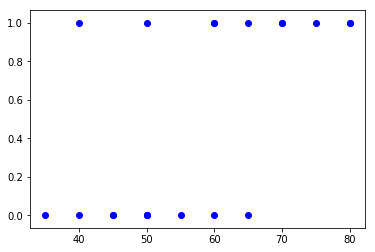

In [13]:

plt.cla()
plt.scatter(myDF["traitanxiety"],myDF["secondha"], color=['blue'])
plt.scatter(myDF["traitanxiety"],myDF["PredP"], color=['red'])
plt.plot(myDF["traitanxiety"],myDF["PredP"])
plt.xlabel("Trait Anxiety")
plt.ylabel("P(Second Heart Attack)")
plt.title("Logistic Regression")
plt.show()

In [47]:
myDF = myDF.sort_values('PredP', ascending=True) # why do we do this?
#sorts the data in TA by numeric order

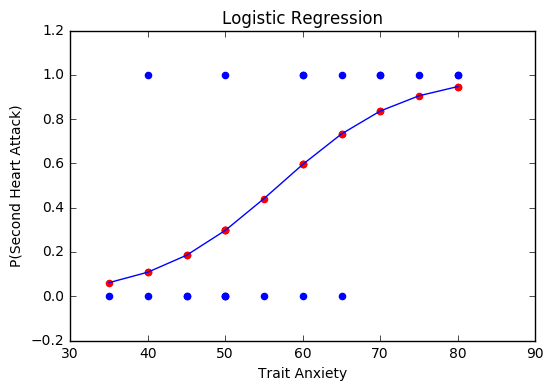

In [48]:
plt.scatter(myDF["traitanxiety"],myDF["secondha"], color=['blue'])
plt.scatter(myDF["traitanxiety"],myDF["PredP"], color=['red'])
plt.plot(myDF["traitanxiety"],myDF["PredP"])
plt.xlabel("Trait Anxiety")
plt.ylabel("P(Second Heart Attack)")
plt.title("Logistic Regression")
plt.show()

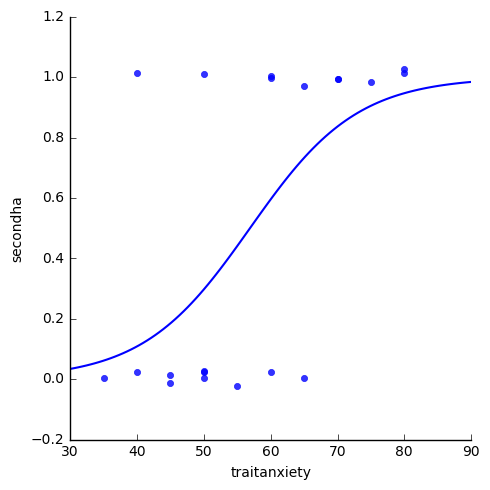

In [49]:
# Alternative to plotting using matplotlib
sns.lmplot(x="traitanxiety", y="secondha", data=myDF,
           logistic=True, y_jitter=.03, ci=None);